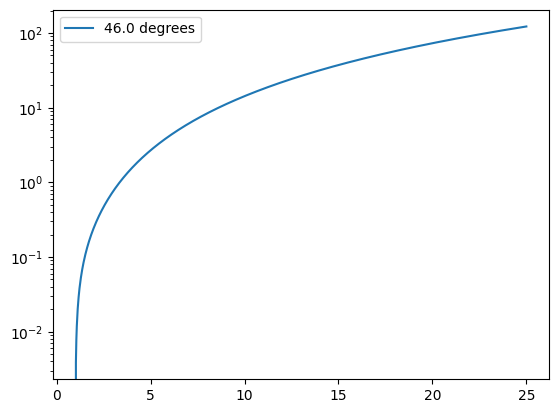

Flux at 21 AU: 81.88877240612763


In [89]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import quad
from astropy import constants

from data_file import source_list_garrett, luminosity_list_barenfeld_updated, radius_dust_updated, flux_list_2_87mm_garrett, flux_barenfeld_0_88mm_updated
from Table_1 import distances_106
from Table_2 import surface_density_list
from Table_3 import opacity_list_3mm, opacity_list_0_87mm, temperature_list_van_der_plas
# all constants in cgs
wavelength_list = [0.088, 0.287]
c = constants.c.cgs.value
h = constants.h.cgs.value
k_b = constants.k_B.cgs.value
s_b = constants.sigma_sb.cgs.value
L_sun = constants.L_sun.cgs.value
c = constants.c.cgs.value

star_name = "J16153456-2242421"
index_star = source_list_garrett.index(star_name)

# following values can be changed
flaring = 0.02
log_L_star = luminosity_list_barenfeld_updated[index_star]
L_star = (10 ** log_L_star) * L_sun
k_v_3mm = opacity_list_3mm[index_star]
k_v_0_87mm = opacity_list_0_87mm[index_star]
sur_den_0 = surface_density_list[index_star]

temperature_star = temperature_list_van_der_plas[index_star]
AU_in_cm = 1.5 * 10 ** 13
d = distances_106[index_star] * AU_in_cm
R_in = 1 *AU_in_cm
R_out = radius_dust_updated[index_star] * AU_in_cm
R_out_list = np.linspace(1, 25, 1000) * AU_in_cm


function_to_integrate = lambda R, planck_function_wavelength: planck_function_wavelength * R

def planck_function_frequency(frequency, temperature):
    """
    Returns the Planck function at a given frequency and temperature.
    """
    exponent = h*frequency/(k_b*temperature)
    return 2*h*frequency**3/c**2 * 1/(np.exp(exponent)-1)

def integrated_planck_radius(R_in, R_out, temperature):
    """
    Integrates the Planck function multiplied by the radius from R_in to R_out.
    Returns the result in units of erg/s/cm^2.
    """
    function_to_integrate = lambda R, temperature: 4*np.pi*R**2*planck_function_frequency(c/0.088, temperature)
    result, _ = quad(function_to_integrate, R_in, R_out, args=(temperature,))
    return result

def passive_T(R, L_star, flaring=0.02):
    T = (flaring * L_star / (8 * np.pi * R ** 2 * s_b)) ** (1/4)
    return T

def final(i, d, R_in, R_out, L_star, flaring=0.02):
    theoretical_flux = 2 * np.pi * np.cos(i) * integrated_planck_radius(R_in, R_out, passive_T(R_out, L_star, flaring=0.02)) / (d**2)
    return theoretical_flux

i = 46 * np.pi/180
# for i in radians from 'x' degrees i = x * np.pi/180
# for i in degrees from 'x' radians i = x * 180/np.pi
y_values = []
for radiuses in R_out_list:
    y_values.append(final(i, d, R_in, radiuses, L_star, flaring=0.02))
i = i * 180/np.pi
plt.plot(R_out_list/AU_in_cm, y_values, label= str(i) + " degrees")

plt.legend()
plt.yscale('log')
plt.show()

i = 46 * np.pi/180
flux_21AU = final(i, d, R_in, 21.012 * AU_in_cm, L_star, flaring=0.02)
print('Flux at 21 AU:', flux_21AU)

In [90]:
print(round(flux_barenfeld_0_88mm_updated[index_star]/flux_21AU * 100, 2), '%')

14.35 %
